In [1]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from config.path import get_training_data_path

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

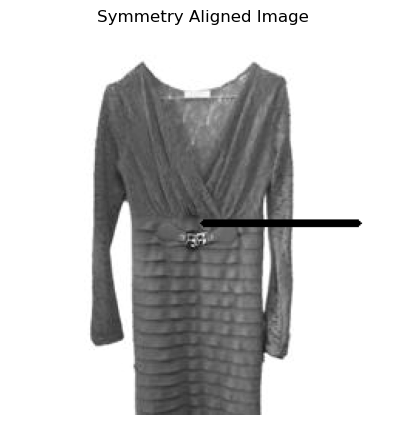

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def detect_symmetry_axis(image, width, height):
    # Implement symmetry detection logic here
    # Placeholder: return a random line for demonstration
    return width // 2, height // 2, width // 2 + 100, height // 2

def rotate_using_symmetry_and_plot_with_moments(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    width, height = image.shape[1], image.shape[0]
    
    # Detect symmetry axis (This should be replaced with actual symmetry detection logic)
    sx1, sy1, sx2, sy2 = detect_symmetry_axis(image, width, height)
    
    # Define the rotation matrix and apply it using the detected symmetry
    angle = np.degrees(np.arctan2(sy2 - sy1, sx2 - sx1))
    rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Following steps remain same for thresholding and moment calculations
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    moments = cv2.moments(binary_image)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])

        # Drawing the symmetry line for visualization
        cv2.line(image, (sx1, sy1), (sx2, sy2), (0, 255, 0), 3)
    
    # Display results
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap='gray')
    plt.title('Symmetry Aligned Image')
    plt.axis('off')
    plt.show()

relative_path = get_training_data_path('classifier', 'dress')
full_path = os.path.join(relative_path, 'dress7.jpg')
rotate_using_symmetry_and_plot_with_moments(full_path)

